<a href="https://colab.research.google.com/github/VienneseWaltz/DeepLearningExploration/blob/main/DeepLearningClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Data and review content
iris_data = pd.read_csv("iris.csv")

print("\nLoaded Data: \n----------------------------------------------")
print(iris_data.head())

# Use a Label encoder to convert String to numeric values
# for the target variable

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])

# For Keras Deep Learning, convert input to numpy array
np_iris = iris_data.to_numpy()

# Separate feature and target variables
# X_data has 4 columns and Y_data has 1 column
X_data = np_iris[:, 0:4] # column 1 to 3 data
Y_data = np_iris[:, 4]   # column 4 data only

print("\nFeatures before scaling : \n----------------------------------------------")
print(X_data[:5, :])
print("\nTarget before scaling : \n-----------------------------------------------")
print(Y_data[:5])

# Create a scalar model that is fit on the input data
scaler = StandardScaler().fit(X_data)

# Scale the numeric feature variables
X_data = scaler.transform(X_data)

# The target variable is multi-class. Hence, we will convert the target variable
# as a one-hot-encoding array of 3 columns, with each column representing a species
Y_data = tf.keras.utils.to_categorical(Y_data, 3)

print("\nFeatures after scaling : \n--------------------------------------------")
print(X_data[:5, :])
print("\nTarget after one-hot-encoding: \n---------------------------------------")
print(Y_data[:5, :])


# Split training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.10)

print("\nTrain Testing Dimensions: \n--------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)





Loaded Data: 
----------------------------------------------
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Features before scaling : 
----------------------------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before scaling : 
-----------------------------------------------
[0. 0. 0. 0. 0.]

Features after scaling : 
--------------------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1

**4.3 Creating a Model**
Creating a model in Keras requires defining:
1. Number of hidden layers
2. Number of nodes in each layer
3. Activation functions
4. Loss Function & Accuracy measurements

In [ ]:
from tensorflow import keras
# Number of classes in the target variable
NB_CLASSES = 3

# Create a sequential model in Keras
model = tf.keras.models.Sequential()

# Add the first hidden layer
model.add(keras.layers.Dense(128,                       # Number of nodes
                             input_shape=(4,),          # Number of input variables
                             name = 'Hidden-Layer-1',   # Logical name
                             activation='relu'))        # activation

# Add a second layer
model.add(keras.layers.Dense(128,
                             name='Hidden-Layer-2',
                             activation='relu'))

# Add an output layer with softmax activation. No. of nodes will be equal to the
# NB_CLASSES
model.add(keras.layers.Dense(NB_CLASSES,
                             name = 'Output-Layer',
                             activation = 'softmax'))

# Compile the model with loss & metrics
model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Print the model meta-data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**4.4 Training and evaluating the Model**
Training the model involves defining various training models and then perform forward and backward propagation.


Training Progress: 
---------------------------------------------
Epoch 1/10
7/7 [==============================] - 1s 43ms/step - loss: 0.8247 - accuracy: 0.7593 - val_loss: 0.5878 - val_accuracy: 0.8148
Epoch 2/10
7/7 [==============================] - 0s 9ms/step - loss: 0.5448 - accuracy: 0.8426 - val_loss: 0.4402 - val_accuracy: 0.8148
Epoch 3/10
7/7 [==============================] - 0s 6ms/step - loss: 0.4449 - accuracy: 0.8426 - val_loss: 0.3717 - val_accuracy: 0.8148
Epoch 4/10
7/7 [==============================] - 0s 7ms/step - loss: 0.3864 - accuracy: 0.8704 - val_loss: 0.3344 - val_accuracy: 0.8148
Epoch 5/10
7/7 [==============================] - 0s 7ms/step - loss: 0.3460 - accuracy: 0.8519 - val_loss: 0.3027 - val_accuracy: 0.8519
Epoch 6/10
7/7 [==============================] - 0s 10ms/step - loss: 0.3131 - accuracy: 0.8611 - val_loss: 0.2604 - val_accuracy: 0.9259
Epoch 7/10
7/7 [==============================] - 0s 9ms/step - loss: 0.2854 - accuracy: 0.8704 - val_l

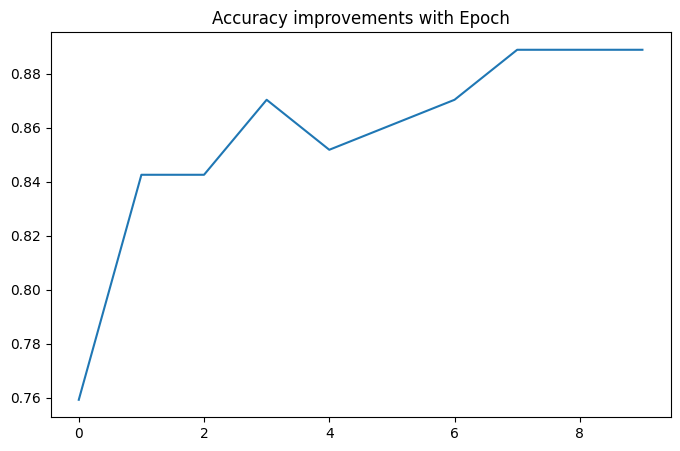


Evaluation against Test Dataset: 
---------------------------------------------
1/1 [==============================] - 0s 24ms/step - loss: 0.2403 - accuracy: 0.8667


[0.24028703570365906, 0.8666666746139526]

In [ ]:
# Make it verbose so we can see the progress
VERBOSE = 1

# Setup Hyperparameters for training

# Set Batch Size
BATCH_SIZE = 16
# Set number of epochs
EPOCHS = 10
# Set validation split. 20% of the training data will be used for validation after each epoch
VALIDATION_SPLIT = 0.2

print("\nTraining Progress: \n---------------------------------------------")

# Fit the model. This will perform the entire training cycle, including forward propagation,
# loss computation, backward propagation, and gradient descent.
# Execute for the specified batch sizes and epoch.
# Perform validation after each epoch.
history = model.fit(X_train,                            # input
                    Y_train,                            # target variable
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = VERBOSE,
                    validation_split = VALIDATION_SPLIT)

print("\nAccuracy during Training: \n----------------------------------------------")

import matplotlib.pyplot as plt

# Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

# Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset: \n---------------------------------------------")
model.evaluate(X_test, Y_test)


**4.5 Saving and Loading Models**
The training and infernece environments are usually separate. Models need to be saved after they are validated. They are then loaded into the inference environments for actual predictioin.

In [ ]:
# Saving a model
model.save("iris_save")

# Loading a Model
loaded_model = keras.models.load_model("iris_save")

# Print Model Summary
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**4.6 Predictions with Deep Learning Models**




In [ ]:
# Raw prediction data
# Prediction input of 4 feature variables, namely sepal length, sepal width, petal length
# and petal width
prediction_input = [[6.6, 4., 4.4, 1.4]]

# Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

# Get raw prediction preobabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities): ", raw_prediction)

# Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))


1/1 [==============================] - 0s 94ms/step
Raw Prediction Output (Probabilities):  [[0.2826173  0.5756551  0.14172757]]
Prediction is  ['versicolor']


**Spam Classification Problem**

**Test Preprocessing needed:**
 * Clearnsing
 * Stop word removal
 * Lemmatization
 * Numeric representation
   * TF-IDF vs. word embedding









In [ ]:
!pip install nltk

import nltk

nltk.download('stopwords')
nltk.download ('punkt')

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**5.2 Creating Text Representations**

Text data needs to be converted to numeric representations before they can be used to train deep learning models. The Spam classification feature data is converted to TF-IDF vectors and the target variable is converted to one-hot encoding.

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

# Load Spam Data and review content
spam_data = pd.read_csv("Spam-Classification.csv")

print("\nLoaded Data : \n---------------------------------------")
print(spam_data.head())

# Separate feature and target data
spam_classes_raw = spam_data["CLASS"]
spam_messages = spam_data["SMS"]



Loaded Data : 
---------------------------------------
  CLASS                                                SMS
0   ham   said kiss, kiss, i can't do the sound effects...
1   ham      &lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2  spam  (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3  spam  * FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4  spam  **FREE MESSAGE**Thanks for using the Auction S...


In [ ]:
import nltk
import tensorflow as tf

from nltk.corpus import stopwords
nltk.download('stopwords')

# Custom toeknizer to remove stopwords and use lemmatization
def customtokenize(str):
  # Split string as tokens
  tokens = nltk.word_tokenize(str)
  # Fliter for stopwords
  nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
  # Perform lemmatization
  lemmatized = [lemmatizer.lemmatize(word) for word in nostop]
  return lemmatized

from sklearn.feature_extraction.text import TfidfVectorizer

# Build a TF-IDF Vectorizer model
vectorizer = TfidfVectorizer(tokenizer = customtokenize)

# Transform feature input to TF-IDF
tfidf = vectorizer.fit_transform(spam_messages)

# Convert TF-IDF to numpy array
tfidf_array = tfidf.toarray()

# Build a label encoder for target variable to convert strings to numeric values
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
spam_classes = label_encoder.fit_transform(spam_classes_raw)

# Convert target to one-hot encoding vector
spam_classes = tf.keras.utils.to_categorical(spam_classes, 2)

print("TF-IDF Matrix Shape: ", tfidf.shape)
print("ONe-hot Encoding Shape:", spam_classes.shape)

X_train, X_test, Y_train, Y_test = train_test_split(tfidf_array, spam_classes, test_size=0.10)





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF Matrix Shape:  (1500, 4566)
ONe-hot Encoding Shape: (1500, 2)


In [ ]:
# The feature variables have 4,566 columns and the target variable has 2.

**5.3 Building and Evaluating the Model**

In [ ]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

# Set up Hyperparameters for building the model
NB_CLASSES = 2
N_HIDDEN = 32  # No. of nodes in hidden layer

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape = (X_train.shape[1],),
                             name= 'Hidden-Layer-1',
                             activation = 'relu'))

model.add(keras.layers.Dense(N_HIDDEN,
                             name = 'Hidden-Layer-2',
                             activation = 'relu'))

model.add(keras.layers.Dense(NB_CLASSES,
                             name = 'Output-Layer',
                             activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 32)                146144    
                                                                 
 Hidden-Layer-2 (Dense)      (None, 32)                1056      
                                                                 
 Output-Layer (Dense)        (None, 2)                 66        
                                                                 
Total params: 147266 (575.26 KB)
Trainable params: 147266 (575.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Training Progress: 
--------------------------------------------
Epoch 1/10
5/5 [==============================] - 1s 126ms/step - loss: 0.6883 - accuracy: 0.6537 - val_loss: 0.6769 - val_accuracy: 0.8259
Epoch 2/10
5/5 [==============================] - 0s 32ms/step - loss: 0.6635 - accuracy: 0.8833 - val_loss: 0.6485 - val_accuracy: 0.8852
Epoch 3/10
5/5 [==============================] - 0s 36ms/step - loss: 0.6255 - accuracy: 0.9380 - val_loss: 0.6124 - val_accuracy: 0.9370
Epoch 4/10
5/5 [==============================] - 0s 31ms/step - loss: 0.5787 - accuracy: 0.9694 - val_loss: 0.5729 - val_accuracy: 0.9296
Epoch 5/10
5/5 [==============================] - 0s 39ms/step - loss: 0.5281 - accuracy: 0.9796 - val_loss: 0.5305 - val_accuracy: 0.9370
Epoch 6/10
5/5 [==============================] - 0s 33ms/step - loss: 0.4753 - accuracy: 0.9843 - val_loss: 0.4864 - val_accuracy: 0.9407
Epoch 7/10
5/5 [==============================] - 0s 29ms/step - loss: 0.4212 - accuracy: 0.9833 - 

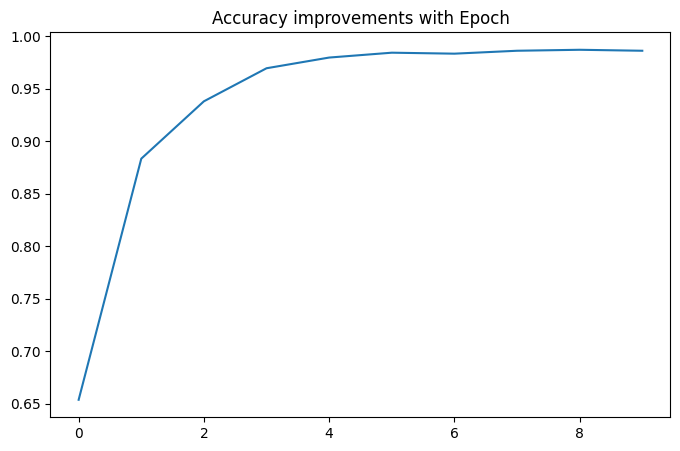


Evaluation against Test Dataset : 
---------------------------------
5/5 [==============================] - 0s 5ms/step - loss: 0.3153 - accuracy: 0.9733


[0.3152514696121216, 0.9733333587646484]

In [ ]:
# The model is now created. We can now perform the training.

# Make it verbose so we can see the progress
VERBOSE = 1

# Set up Hyperparameters for training
BATCH_SIZE = 256
EPOCHS = 10
VALIDATION_SPLIT = 0.2

print("\nTraining Progress: \n--------------------------------------------")

history = model.fit(X_train,
                    Y_train,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = VERBOSE,
                    validation_split = VALIDATION_SPLIT)

print("\nAccuracy during training : \n----------------------------------------")
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8,5))
plt.title("Accuracy improvements with Epoch")
plt.show()

print("\nEvaluation against Test Dataset : \n---------------------------------")
model.evaluate(X_test, Y_test)

**5.4 Predicting for Text**

In [ ]:
# Predict for multiple samples using batch processing

# Convert input into IF-IDF vector using the same vectorizer model
predict_tfidf = vectorizer.transform(["FREE entry to a fun contest",
                                      "Yup I will come over"]).toarray()

print(predict_tfidf.shape)

# Predict using model
prediction = np.argmax(model.predict(predict_tfidf), axis=1)
print("Prediction Output:", prediction)

# Print prediction classes
print("Prediction Classes: ", label_encoder.inverse_transform(prediction))



(2, 4566)
1/1 [==============================] - 0s 88ms/step
Prediction Output: [1 0]
Prediction Classes:  ['spam' 'ham']
